# IMPORTING THE LIBRARY

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# IMPORTING THE DATA 

In [202]:
df=pd.read_csv("Churn_Modelling.csv")

# DATA PREPROCESSING

In [203]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [204]:
df.shape

(10000, 14)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [206]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [207]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [208]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [209]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [210]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# DATA VISUALIZATION

<AxesSubplot:>

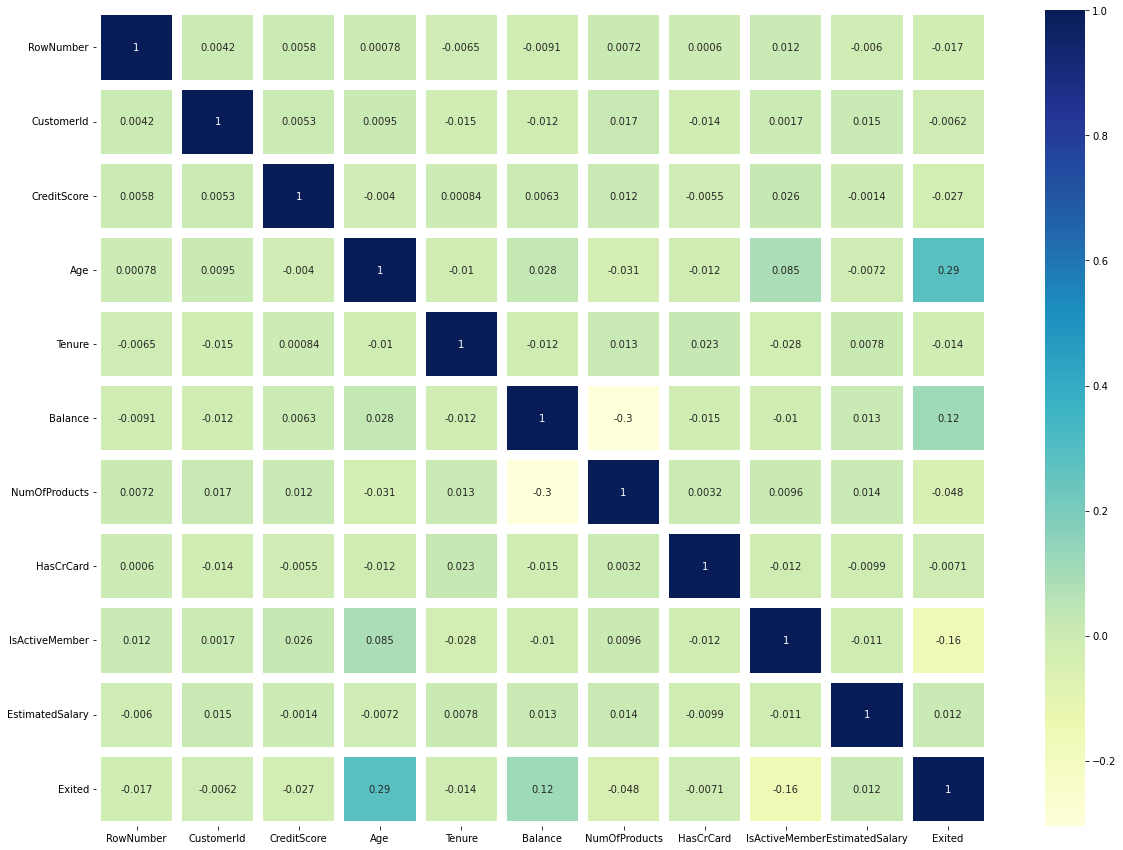

In [211]:
df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=10)

In [215]:
feature_list = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

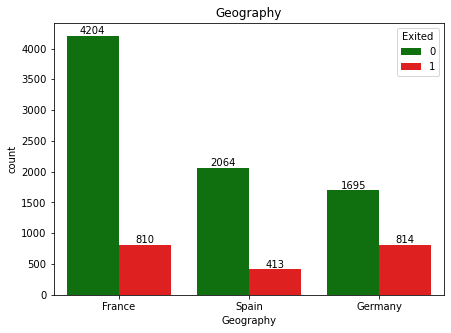

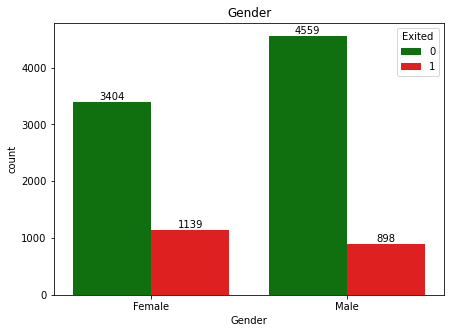

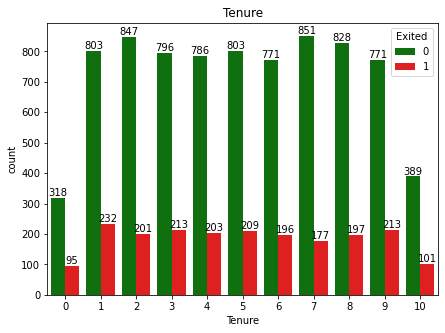

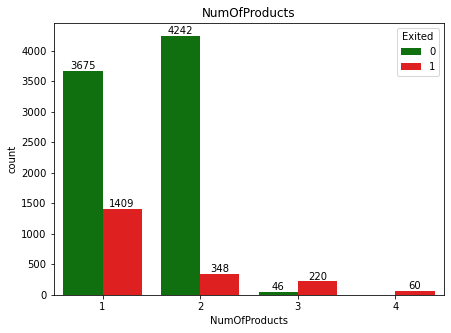

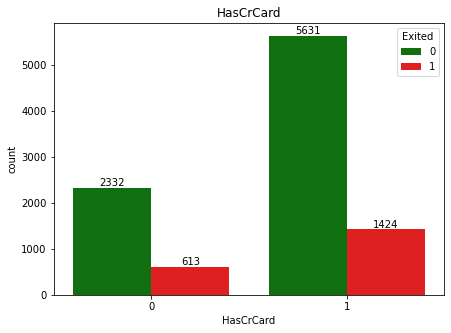

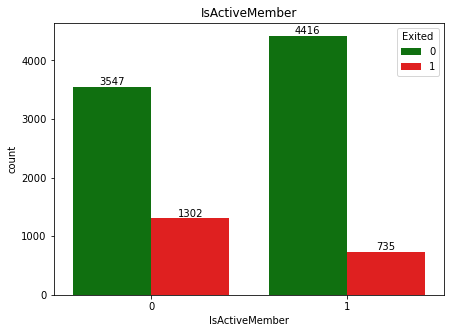

In [216]:
for feature in feature_list:
    plt.figure(figsize=(7,5))
    plt.title(feature)
    ax=sns.countplot(x=feature, hue='Exited', data=df, palette=['green', 'red'])
    
    for container in ax.containers:
        ax.bar_label(container)

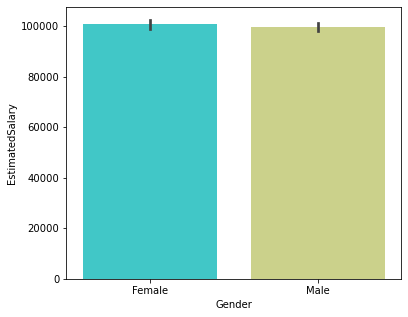

In [214]:
fig = plt.figure(figsize=(6, 5))
ax = sns.barplot(x=df['Gender'],y=df['EstimatedSalary'], 
                 palette='rainbow')
plt.ylabel('EstimatedSalary');

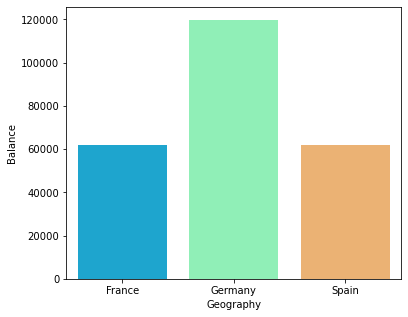

In [213]:
fig = plt.figure(figsize=(6, 5))
ax = sns.barplot(x=df['Geography'].sort_values(ascending=True), 
                 y=df['Balance'], 
                 palette='rainbow',
                 ci = None)
plt.ylabel('Balance');

In [144]:
columns_to_remove=['RowNumber','CustomerId','Surname']

In [145]:
df=df.drop(columns_to_remove,axis=1)

In [146]:
df.shape

(10000, 11)

In [147]:
states=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [148]:
df=pd.concat([df,states,gender],axis=1)

In [149]:
df=df.drop(['Geography','Gender'],axis=1)

In [150]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [151]:
df.shape

(10000, 12)

C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

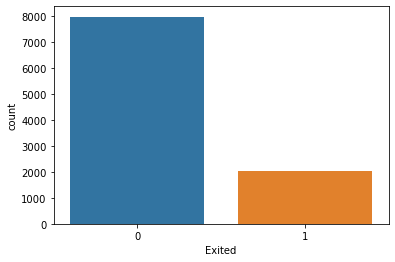

In [152]:
sns.countplot(df['Exited'])

In [153]:
X=df.drop('Exited',axis=1)
Y=df['Exited']

In [154]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [155]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# SPLITTING THE DATA INTO TRAIN SET AND TEST SET

In [156]:
from sklearn.model_selection import train_test_split 

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [158]:
X_train.shape

(7000, 11)

In [159]:
X_test.shape

(3000, 11)

In [160]:
y_train.shape

(7000,)

In [161]:
y_test.shape

(3000,)

# FEATURE SCALING

In [162]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)


array([[-0.21266528, -0.27558386, -1.0440425 , ..., -0.57691038,
        -0.5780101 , -1.09035226],
       [ 2.07282937, -0.08573178, -0.69981484, ...,  1.73337147,
        -0.5780101 ,  0.9171348 ],
       [-0.03605887,  1.14830677, -1.38827017, ...,  1.73337147,
        -0.5780101 , -1.09035226],
       ...,
       [ 0.34831977, -0.3705099 ,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ],
       [ 0.369097  , -0.46543595,  1.36555114, ..., -0.57691038,
         1.73007358,  0.9171348 ],
       [ 0.77425287, -1.22484428,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ]])

In [163]:
scaler.transform(X_test)

array([[ 0.69114397, -0.3705099 , -1.38827017, ..., -0.57691038,
         1.73007358,  0.9171348 ],
       [ 0.27559949,  3.14175366,  1.02132348, ..., -0.57691038,
        -0.5780101 , -1.09035226],
       [ 1.42873542, -0.56036199, -0.01135951, ..., -0.57691038,
        -0.5780101 , -1.09035226],
       ...,
       [ 0.369097  , -1.31977033, -1.38827017, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ],
       [-1.76056847, -1.0349922 ,  1.7097788 , ..., -0.57691038,
        -0.5780101 , -1.09035226],
       [ 0.369097  , -0.3705099 , -0.35558718, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ]])

# MODEL BUILDING

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score,confusion_matrix


In [165]:
c_old=[]
d_old=[]
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Training set Performance
    old_model_train_accuracy=accuracy_score(y_train,y_train_pred)
    old_model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    old_model_train_precision=precision_score(y_train,y_train_pred)
    old_model_train_recall=recall_score(y_train,y_train_pred)
    old_model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    
    
    #test set performance
      
        
    old_model_test_accuracy=accuracy_score(y_test,y_test_pred)
    old_model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    old_model_test_precision=precision_score(y_test,y_test_pred)
    old_model_test_recall=recall_score(y_test,y_test_pred)
    old_model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance For training Set")
    print("  Accuracy Score:{:.4f}".format(old_model_train_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_train_f1))
    print("  Precision:{:.4f}".format(old_model_train_precision))
    print("  Recall:{:.4f}".format(old_model_train_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_train_rocauc_score))
    
    print("------------------------------------------------------")
    
    print("Model Performance For test Set")
    print("  Accuracy Score:{:.4f}".format(old_model_test_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_test_f1))
    print("  Precision:{:.4f}".format(old_model_test_precision))
    print("  Recall:{:.4f}".format(old_model_test_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_test_rocauc_score))
    
    print("******************************************************")
    print('\n')
    c_old.append(old_model_train_accuracy)
    d_old.append(old_model_test_accuracy)
models_used=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
data={'Models        ':models_used,'Training Accuracy':c_old,'Test Accuracy':d_old}
df=pd.DataFrame(data)
print("SUMMARY OF ABOVE ",)
print(df)
    
    

Logistic Regression
Model Performance For training Set
  Accuracy Score:0.7893
  F1 Score:0.7222
  Precision:0.4018
  Recall:0.0615
  ROC Auc  Score:0.5190
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7907
  F1 Score:0.7225
  Precision:0.3678
  Recall:0.0529
  ROC Auc  Score:0.5150
******************************************************


Decision Tree
Model Performance For training Set
  Accuracy Score:1.0000
  F1 Score:1.0000
  Precision:1.0000
  Recall:1.0000
  ROC Auc  Score:1.0000
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7750
  F1 Score:0.7800
  Precision:0.4488
  Recall:0.5074
  ROC Auc  Score:0.6750
******************************************************


Random Forest
Model Performance For training Set
  Accuracy Score:1.0000
  F1 Score:1.0000
  Precision:1.0000
  Recall:1.0000
  ROC Auc  Score:1.0000
------------------------------------------------------
M

# HYPERPARAMETER TUNING

In [75]:
rf_params={"max_depth":[5,8,13,None,10],
          "max_features":[5,7,"auto",9,11,12],
          "min_samples_split":[2,8,15,23],
          "n_estimators":[1200,400,800,1000]}
dt_params={"max_depth":[5,8,13,None,10],
           "max_features":[5,7,"auto",9],
           "random_state":[10,35,67,None],
           "max_leaf_nodes":[6,8,9,None]}
lg_params={"C":[0.01,0.1,1,10],
           "random_state":[10,35,67,None],
           "max_iter":[100,200,400,800]}
knn_params={"n_neighbors":[15,25,30,35,40,45],
            "p":[1,2],
            "n_jobs":[-1,None]}

In [166]:
randomcv_models=[("RANDOM FOREST",RandomForestClassifier(),rf_params),
                 ("Decision Tree",DecisionTreeClassifier(),dt_params),
                ("logistic",LogisticRegression(),lg_params),
                ("knn",KNeighborsClassifier(),knn_params)]

In [168]:
randomcv_models

[('RANDOM FOREST',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 13, None, 10],
   'max_features': [5, 7, 'auto', 9, 11, 12],
   'min_samples_split': [2, 8, 15, 23],
   'n_estimators': [1200, 400, 800, 1000]}),
 ('Decision Tree',
  DecisionTreeClassifier(),
  {'max_depth': [5, 8, 13, None, 10],
   'max_features': [5, 7, 'auto', 9],
   'random_state': [10, 35, 67, None],
   'max_leaf_nodes': [6, 8, 9, None]}),
 ('logistic',
  LogisticRegression(),
  {'C': [0.01, 0.1, 1, 10],
   'random_state': [10, 35, 67, None],
   'max_iter': [100, 200, 400, 800]}),
 ('knn',
  KNeighborsClassifier(),
  {'n_neighbors': [15, 25, 30, 35, 40, 45],
   'p': [1, 2],
   'n_jobs': [-1, None]})]

In [169]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"------------------best parameters for {model_name}----------".format(model_name))
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\muska\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.85957206        nan 0.86128671 0.86114401 0.86357287 0.85728675
        nan 0.85685812 0.86171491 0.85742963 0.85671524 0.86057238
 0.86228704        nan        nan        nan 0.86328657        nan
 0.85614379        nan 0.86300099 0.85842897 0.85557222 0.86328699
 0.85671524 0.86371544 0.8644294  0.86342932 0.85628636 0.85214359
 0.8614294  0.86257261 0.85971548 0.8634295  0.86100095 0.8615721
 0.86128652 0.86200085 0.85742969 0.85257234 0.86314418 0.86242973
 0.86157204 0.86014393 0.8617154         nan 0.86085783 0.85957218
 0.86071538 0.86142934 0.8605722  0.8591433  0.86214404 0.86214367
 0.85700099 0.85957236        nan 0.86314369        nan 0.86171571
 0.86228685 0.86271536 0.86114408 0.85828659        nan 0.86185828
 0.85685818 0.8615721  0.85785826 0.85914416 0.85757195 0.86057201
 0.85685799 0.8605725         nan 0.86028687 0.8550008

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\muska\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits


C:\Users\muska\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits
------------------best parameters for RANDOM FOREST----------
{'n_estimators': 1200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}
------------------best parameters for Decision Tree----------
{'random_state': 35, 'max_leaf_nodes': 8, 'max_features': 5, 'max_depth': 10}
------------------best parameters for logistic----------
{'random_state': 10, 'max_iter': 100, 'C': 0.01}
------------------best parameters for knn----------
{'p': 1, 'n_neighbors': 30, 'n_jobs': -1}


In [40]:
c_new=[]
d_new=[]
models={
    "Logistic Regression":LogisticRegression(random_state=10,max_iter=100,C=0.01),
    "Decision Tree":DecisionTreeClassifier(random_state=35,max_leaf_nodes=None,max_features=9,max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=1200,min_samples_split=8,max_features=11,max_depth=None),
    "KNN":KNeighborsClassifier(n_neighbors=15,p=1,n_jobs=-1)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Training set Performance
    new_model_train_accuracy=accuracy_score(y_train,y_train_pred)
    new_model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    new_model_train_precision=precision_score(y_train,y_train_pred)
    new_model_train_recall=recall_score(y_train,y_train_pred)
    new_model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    
    
    #test set performance
      
        
    new_model_test_accuracy=accuracy_score(y_test,y_test_pred)
    new_model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    new_model_test_precision=precision_score(y_test,y_test_pred)
    new_model_test_recall=recall_score(y_test,y_test_pred)
    new_model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance For training Set")
    print("  Accuracy Score:{:.4f}".format(new_model_train_accuracy))
    print("  F1 Score:{:.4f}".format(new_model_train_f1))
    print("  Precision:{:.4f}".format(new_model_train_precision))
    print("  Recall:{:.4f}".format(new_model_train_recall))
    print("  ROC Auc  Score:{:.4f}".format(new_model_train_rocauc_score))
    
    print("------------------------------------------------------")
    
    print("Model Performance For test Set")
    print("  Accuracy Score:{:.4f}".format(new_model_test_accuracy))
    print("  F1 Score:{:.4f}".format(new_model_test_f1))
    print("  Precision:{:.4f}".format(new_model_test_precision))
    print("  Recall:{:.4f}".format(new_model_test_recall))
    print("  ROC Auc  Score:{:.4f}".format(new_model_test_rocauc_score))
    
    print("******************************************************")
    print('\n')
    c_new.append(new_model_train_accuracy)
    d_new.append(new_model_test_accuracy)
models_used=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
data={'Models    ':models_used,'Train Accuracy':c_new,'Test Accuracy':d_new}
df=pd.DataFrame(data)
print("SUMMARY OF ABOVE ",)
print(df)


Logistic Regression
Model Performance For training Set
  Accuracy Score:0.7894
  F1 Score:0.7223
  Precision:0.4037
  Recall:0.0615
  ROC Auc  Score:0.5191
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7903
  F1 Score:0.7218
  Precision:0.3605
  Recall:0.0512
  ROC Auc  Score:0.5141
******************************************************


Decision Tree
Model Performance For training Set
  Accuracy Score:0.8561
  F1 Score:0.8462
  Precision:0.7114
  Recall:0.4993
  ROC Auc  Score:0.7236
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.8533
  F1 Score:0.8449
  Precision:0.6829
  Recall:0.5091
  ROC Auc  Score:0.7247
******************************************************


Random Forest
Model Performance For training Set
  Accuracy Score:0.9577
  F1 Score:0.9564
  Precision:0.9686
  Recall:0.8198
  ROC Auc  Score:0.9065
------------------------------------------------------
M

In [125]:
# class count
exited_count_0,exited_count_1 = df['Exited'].value_counts()

# Separate class
exited_0 = df[df['Exited'] == 0]
exited_1 = df[df['Exited'] == 1]# print the shape of the class
print('exited 0:', exited_0.shape)
print('exited 1:', exited_1.shape)

exited 0: (7963, 12)
exited 1: (2037, 12)


total class of 1 and 0: 1    7963
0    7963
Name: Exited, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

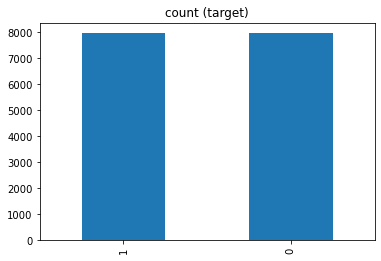

In [129]:
exited_1_over = exited_1.sample(exited_count_0, replace=True)

test_over = pd.concat([exited_1_over, exited_0], axis=0)

print("total class of 1 and 0:",test_over['Exited'].value_counts())# plot the count after under-sampeling
test_over['Exited'].value_counts().plot(kind='bar', title='count (target)')

In [130]:
c_old=[]
d_old=[]
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Training set Performance
    old_model_train_accuracy=accuracy_score(y_train,y_train_pred)
    old_model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    old_model_train_precision=precision_score(y_train,y_train_pred)
    old_model_train_recall=recall_score(y_train,y_train_pred)
    old_model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    
    
    #test set performance
      
        
    old_model_test_accuracy=accuracy_score(y_test,y_test_pred)
    old_model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    old_model_test_precision=precision_score(y_test,y_test_pred)
    old_model_test_recall=recall_score(y_test,y_test_pred)
    old_model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance For training Set")
    print("  Accuracy Score:{:.4f}".format(old_model_train_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_train_f1))
    print("  Precision:{:.4f}".format(old_model_train_precision))
    print("  Recall:{:.4f}".format(old_model_train_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_train_rocauc_score))
    
    print("------------------------------------------------------")
    
    print("Model Performance For test Set")
    print("  Accuracy Score:{:.4f}".format(old_model_test_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_test_f1))
    print("  Precision:{:.4f}".format(old_model_test_precision))
    print("  Recall:{:.4f}".format(old_model_test_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_test_rocauc_score))
    
    print("******************************************************")
    print('\n')
    c_old.append(old_model_train_accuracy)
    d_old.append(old_model_test_accuracy)
models_used=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
data={'Models        ':models_used,'Training Accuracy':c_old,'Test Accuracy':d_old}
df=pd.DataFrame(data)
print("SUMMARY OF ABOVE ",)
print(df)
    
    

Logistic Regression
Model Performance For training Set
  Accuracy Score:0.7893
  F1 Score:0.7222
  Precision:0.4018
  Recall:0.0615
  ROC Auc  Score:0.5190
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7907
  F1 Score:0.7225
  Precision:0.3678
  Recall:0.0529
  ROC Auc  Score:0.5150
******************************************************


Decision Tree
Model Performance For training Set
  Accuracy Score:1.0000
  F1 Score:1.0000
  Precision:1.0000
  Recall:1.0000
  ROC Auc  Score:1.0000
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7790
  F1 Score:0.7848
  Precision:0.4586
  Recall:0.5306
  ROC Auc  Score:0.6862
******************************************************


Random Forest
Model Performance For training Set
  Accuracy Score:1.0000
  F1 Score:1.0000
  Precision:1.0000
  Recall:1.0000
  ROC Auc  Score:1.0000
------------------------------------------------------
M

<AxesSubplot:>

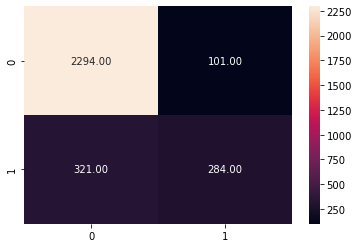

In [217]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=50)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.2f')

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2395
           1       0.74      0.47      0.57       605

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

